In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the train dataset
df = pd.read_csv("train.csv")

# EDA

In [3]:
# Display the first few rows of the train dataset
display(df.head())
df.describe()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,4,2022-02-01,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984


,ID,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,food_waste_kg
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,528.327113,375.405049,11.900110,22.189280,60.761313,3.014270,0.085620,27.015691,44.842691
std,305.072794,502.812717,4.285153,8.922389,17.330821,2.009542,0.279956,12.774223,27.934366
min,0.000000,100.000000,5.000000,-10.372207,30.121111,0.000000,0.000000,5.008394,10.819048
25%,266.000000,211.000000,8.000000,15.684585,46.017835,1.000000,0.000000,16.091383,32.887912
50%,531.000000,306.000000,12.000000,22.115040,61.633960,3.000000,0.000000,26.854109,41.146930
75%,795.500000,407.000000,15.000000,28.804294,75.787910,5.000000,0.000000,38.149878,50.046681
max,1049.000000,4730.000000,19.000000,60.000000,89.982828,6.000000,1.000000,49.803703,274.328783


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                911 non-null    int64  
 1   date              911 non-null    object 
 2   meals_served      911 non-null    int64  
 3   kitchen_staff     911 non-null    int64  
 4   temperature_C     911 non-null    float64
 5   humidity_percent  911 non-null    float64
 6   day_of_week       911 non-null    int64  
 7   special_event     911 non-null    int64  
 8   past_waste_kg     911 non-null    float64
 9   staff_experience  747 non-null    object 
 10  waste_category    911 non-null    object 
 11  food_waste_kg     911 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 85.5+ KB


None

In [5]:
dtype1=df.dtypes
uniqes=df.nunique()
pd.DataFrame({"data types":dtype1,"Num_uniq":uniqes}).T

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
data types,int64,object,int64,int64,float64,float64,int64,int64,float64,object,object,float64
Num_uniq,911,867,373,15,892,867,7,2,867,4,5,867


In [6]:
pd.DataFrame({"Null %":df.isnull().sum()/df.shape[0]*100,"Null count":df.isnull().sum()}).T

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.002195,0.0,0.0
Null count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.000000,0.0,0.0


In [7]:
display(df["staff_experience"].value_counts())

staff_experience
Beginner        191
Intermediate    186
EXPERT          186
intermediate    184
Name: count, dtype: int64

In [8]:
display(df["waste_category"].value_counts())

waste_category
MEAT          210
dairy         180
Vegetables    176
GRAINS        176
MeAt          169
Name: count, dtype: int64

In [9]:
display(df["kitchen_staff"].value_counts())

kitchen_staff
12    72
5     69
10    68
13    64
9     64
15    63
18    61
11    60
7     59
14    59
19    58
6     57
17    54
16    52
8     51
Name: count, dtype: int64

In [10]:
display(df["day_of_week"].value_counts())

day_of_week
6    133
5    133
2    132
0    131
3    128
1    127
4    127
Name: count, dtype: int64

In [11]:
# check dublicates
df.duplicated().sum()

0

## Univariate Analysyis

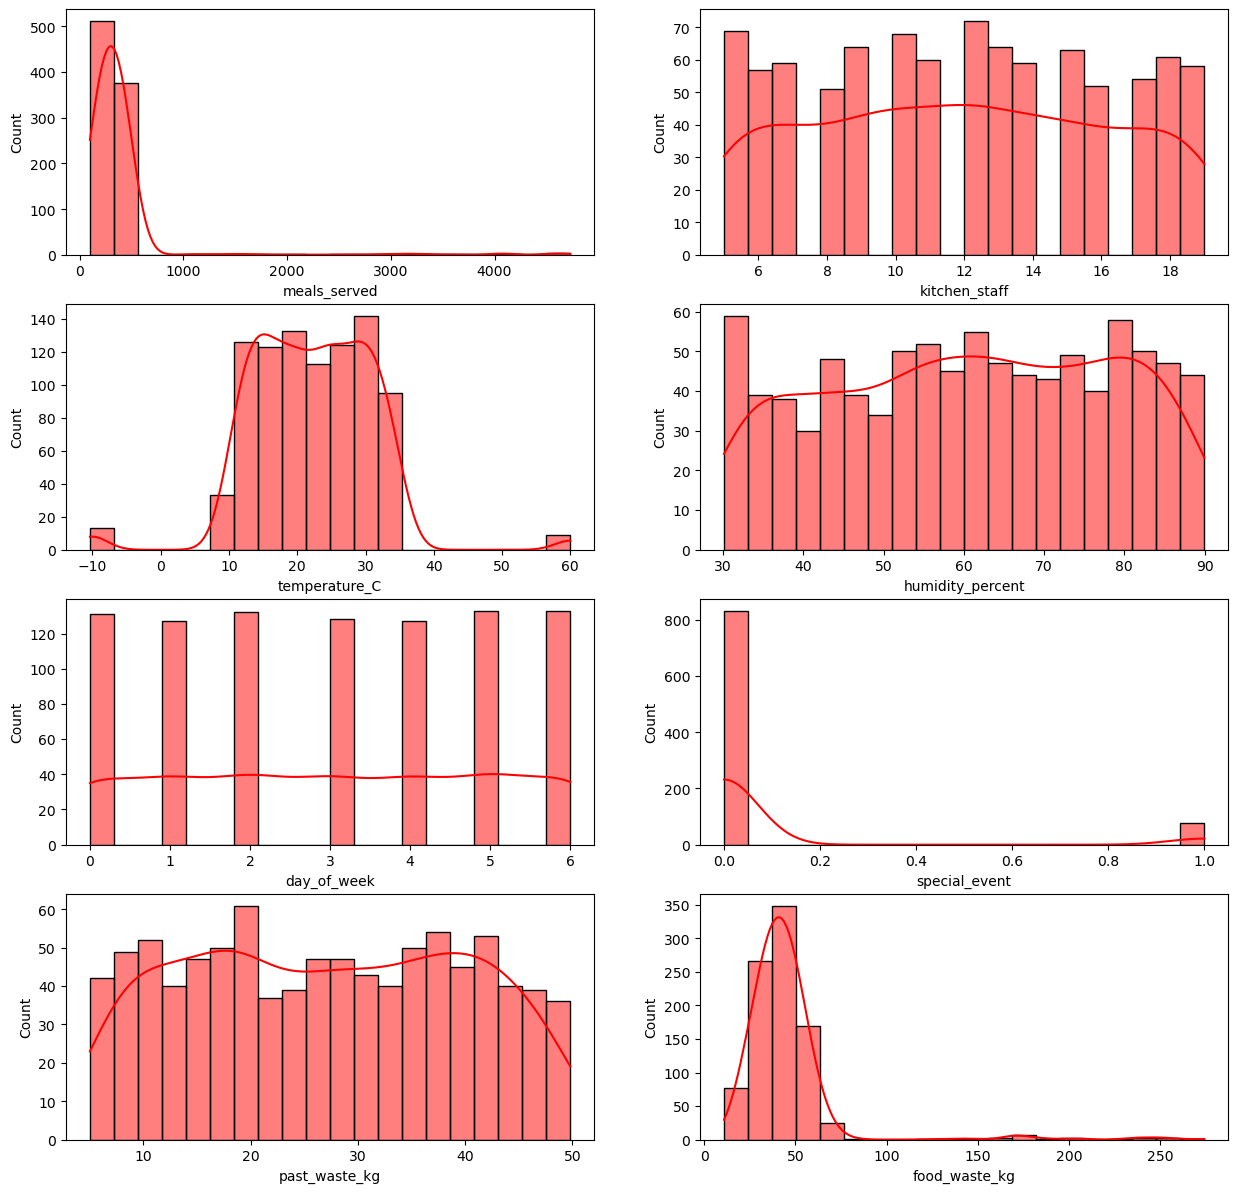

ID                 -0.015749
meals_served        6.581128
kitchen_staff       0.020202
temperature_C       0.111854
humidity_percent   -0.093234
day_of_week        -0.008186
special_event       2.966833
past_waste_kg       0.016268
food_waste_kg       4.990900
dtype: float64

<Figure size 640x480 with 0 Axes>

In [12]:
def histplots(data):
    data=data.select_dtypes("number")
    plt.figure(figsize=(15,30))
    for i,col in enumerate(data.columns,1):
        plt.subplot(8,2,i)
        sns.histplot(x=data[col],color="red",kde=True,bins=20)
    plt.show()
    plt.tight_layout()

histplots(df.iloc[:,1:])
df.skew(numeric_only=True)

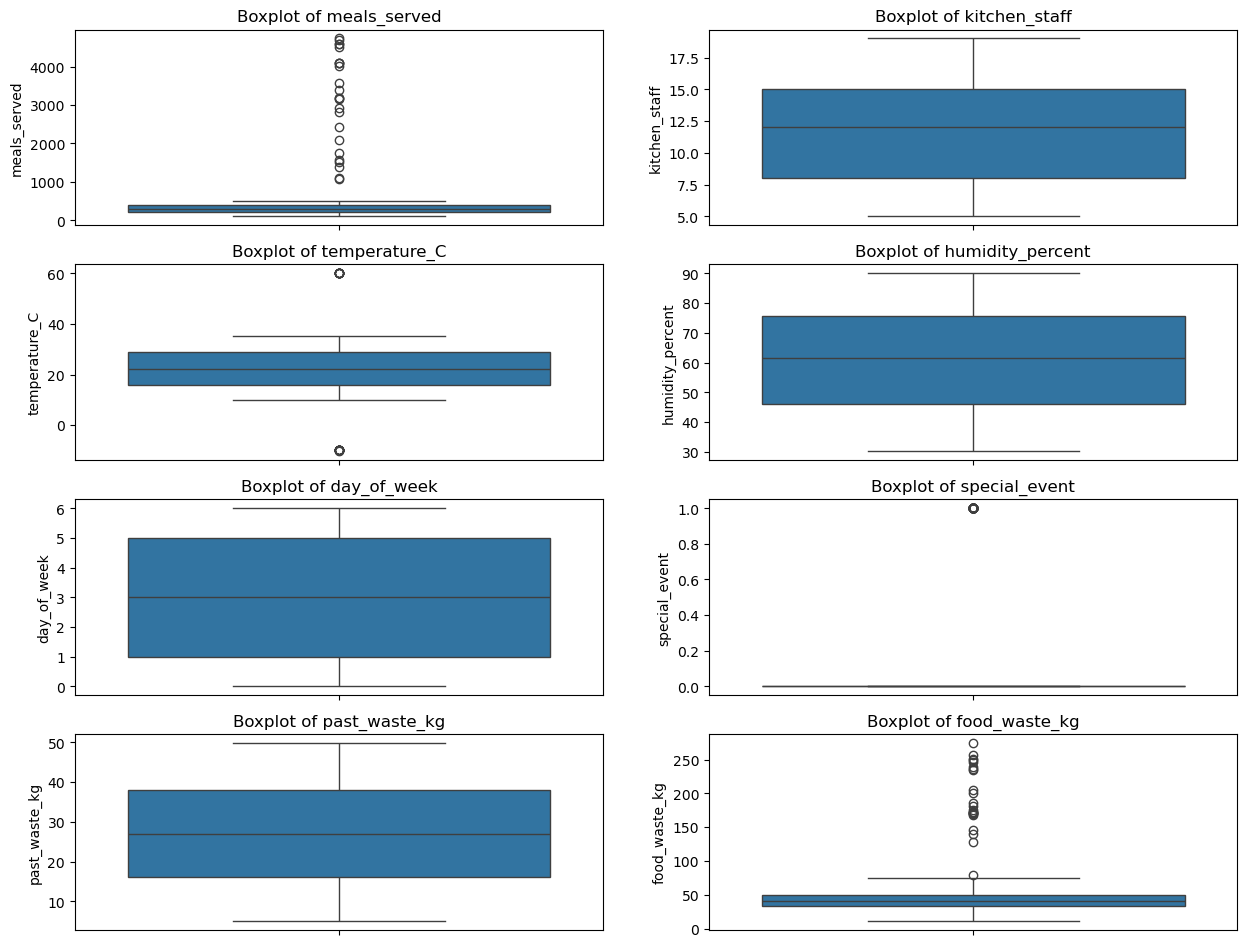

<Figure size 640x480 with 0 Axes>

In [13]:
def boxplot(data):
    data=data.select_dtypes("number")
    plt.figure(figsize=(15,30))
    for i,col in enumerate(data.columns,1):
        plt.subplot(10,2,i)
        plt.title(f"Boxplot of {col}")
        sns.boxplot(y=data[col])
    plt.show()
    plt.tight_layout()

boxplot(df.iloc[:,1:])    

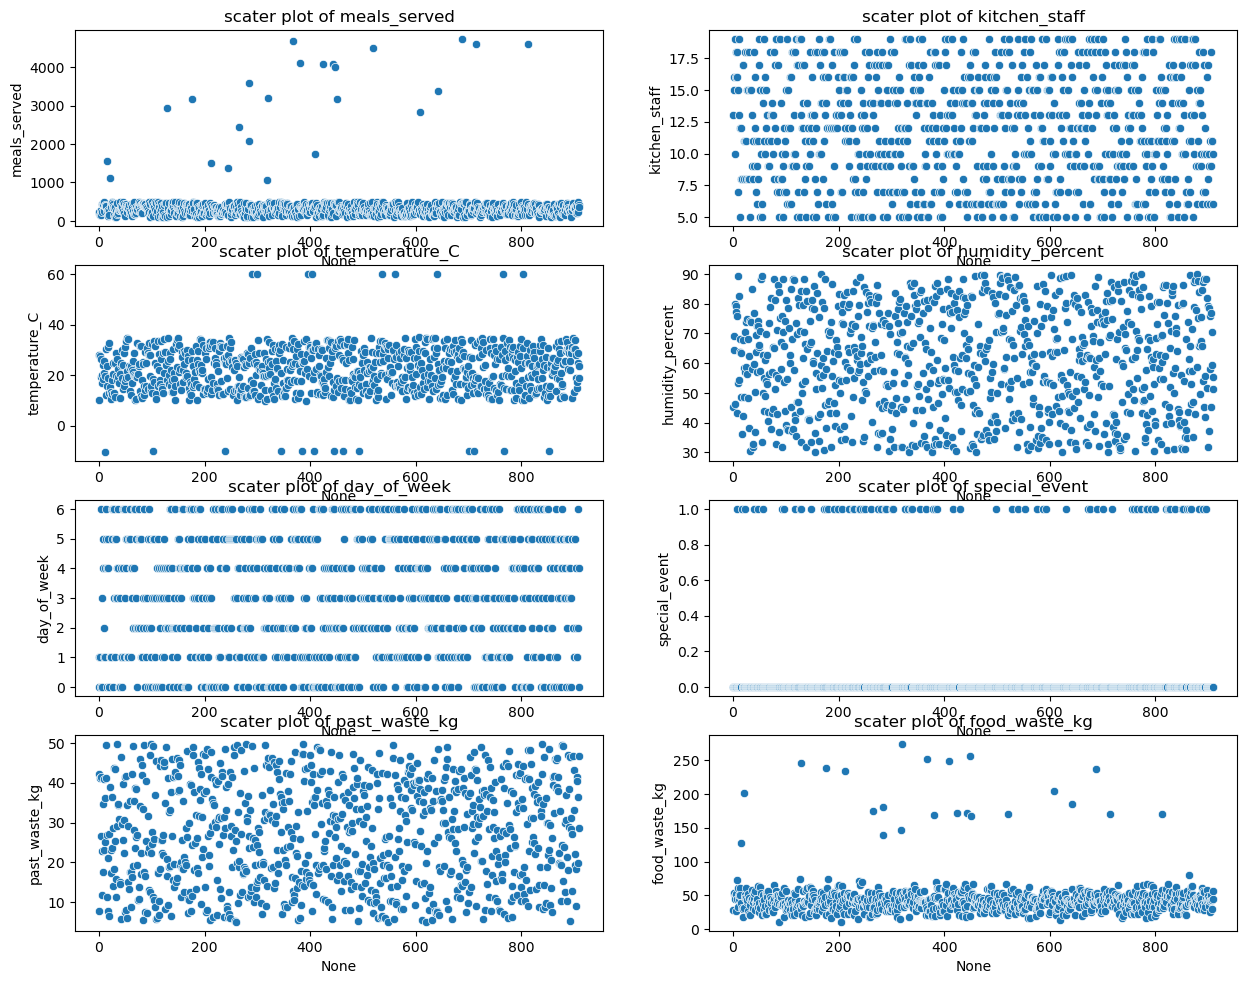

<Figure size 640x480 with 0 Axes>

In [14]:
def scater_plot(data):
    data=data.select_dtypes("number")
    plt.figure(figsize=(15,30))
    for i,col in enumerate(data.columns,1):
        plt.subplot(10,2,i)
        sns.scatterplot(x=data.index,y=data[col])
        plt.title(f"scater plot of {col}")
    plt.show()
    plt.tight_layout()

scater_plot(df.iloc[:,1:])

## Bivariate Analysis

### Numerical VS Numerical

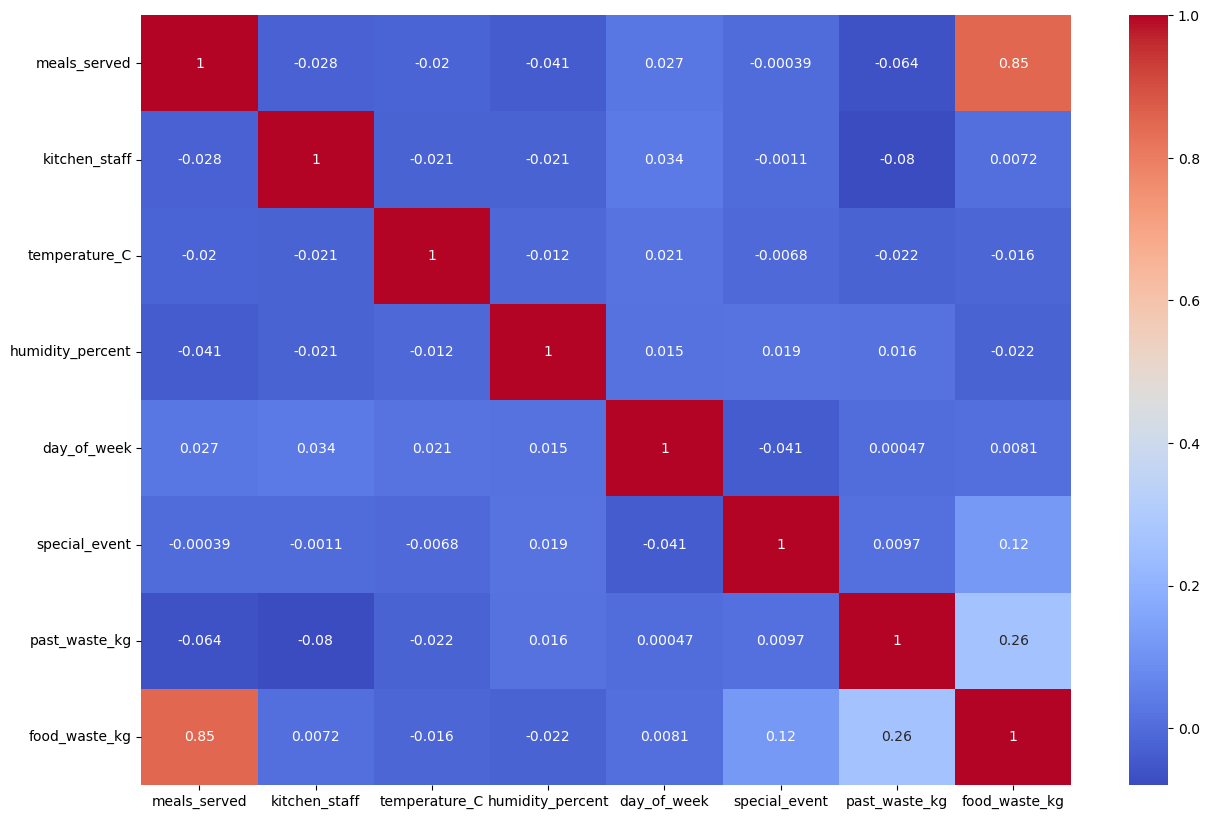

In [15]:
def numerical_vs_numerical(data):
    data1=data.select_dtypes("number")
    corr_matrix=data1.corr()
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.show()

numerical_vs_numerical(df.iloc[:,1:])


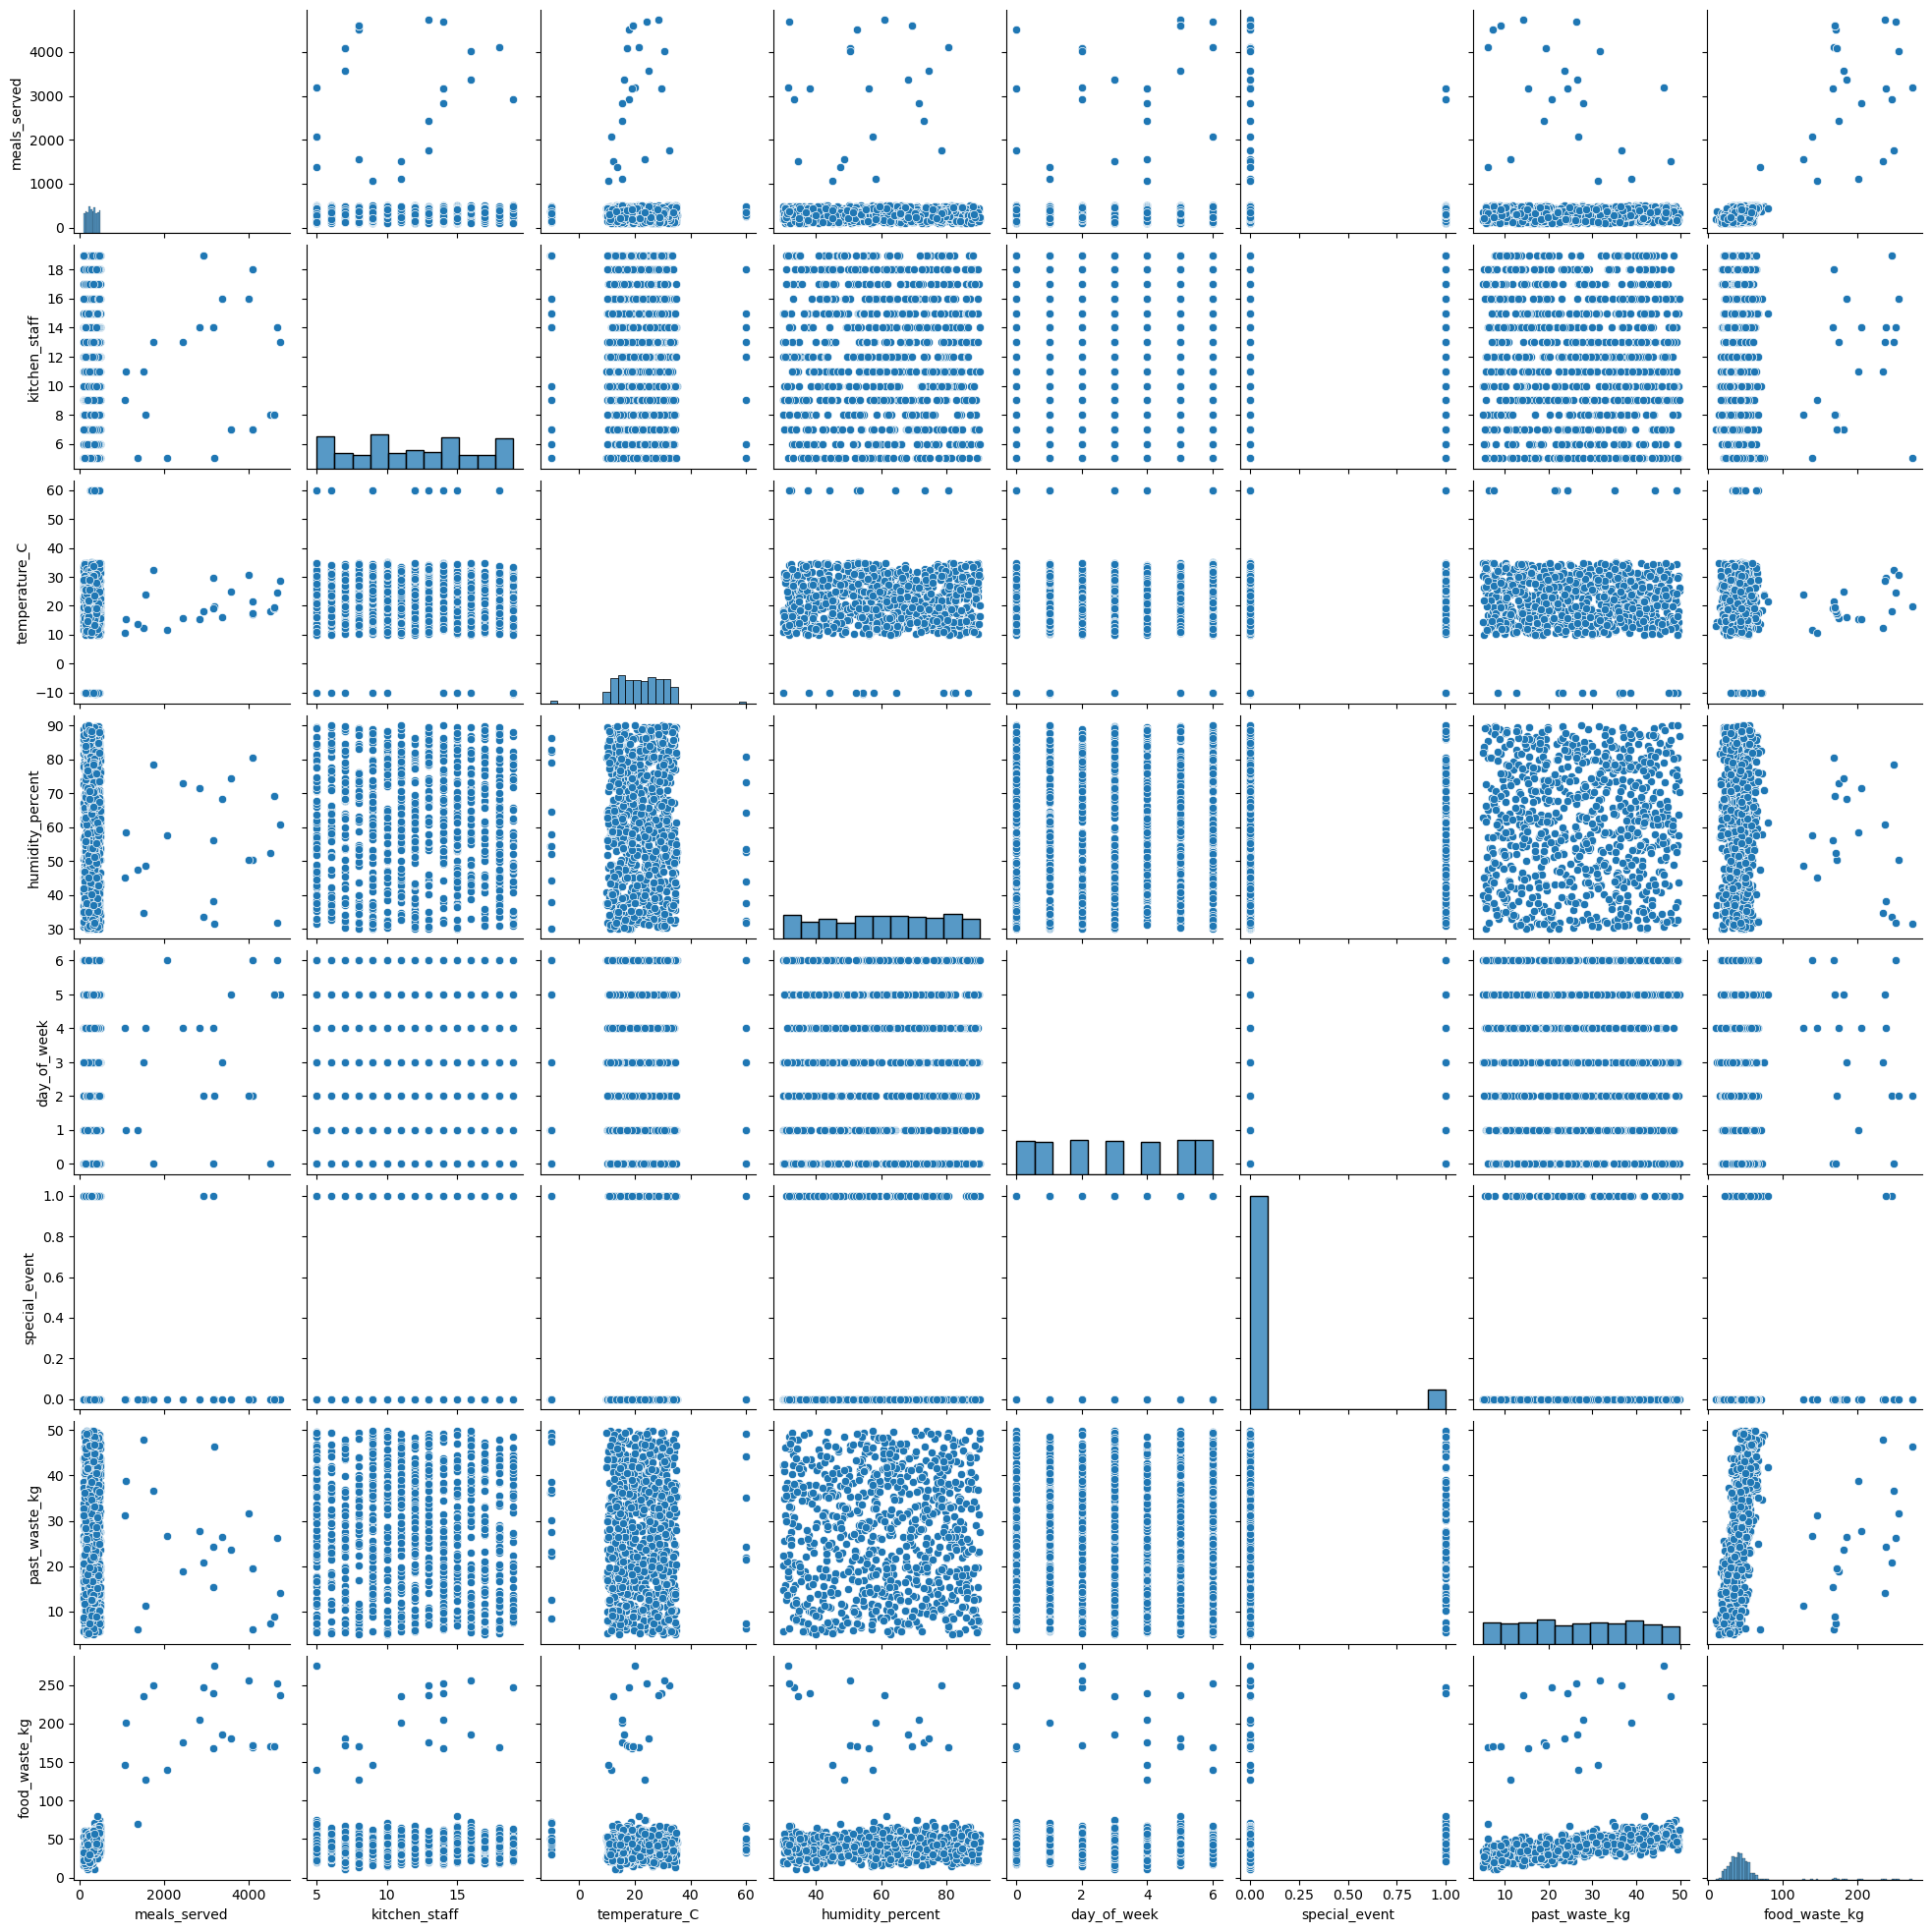

In [16]:
sns.pairplot(df.iloc[:,1:])
plt.show()

## categorical vs numerical

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\35205197.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["special_event"],y=data1[col],ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\35205197.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["special_event"],y=data1[col],ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\35205197.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["special_event"],y=data1[col],ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\35205197.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["special_event"],y=data1[col],ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\35205197.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=Non

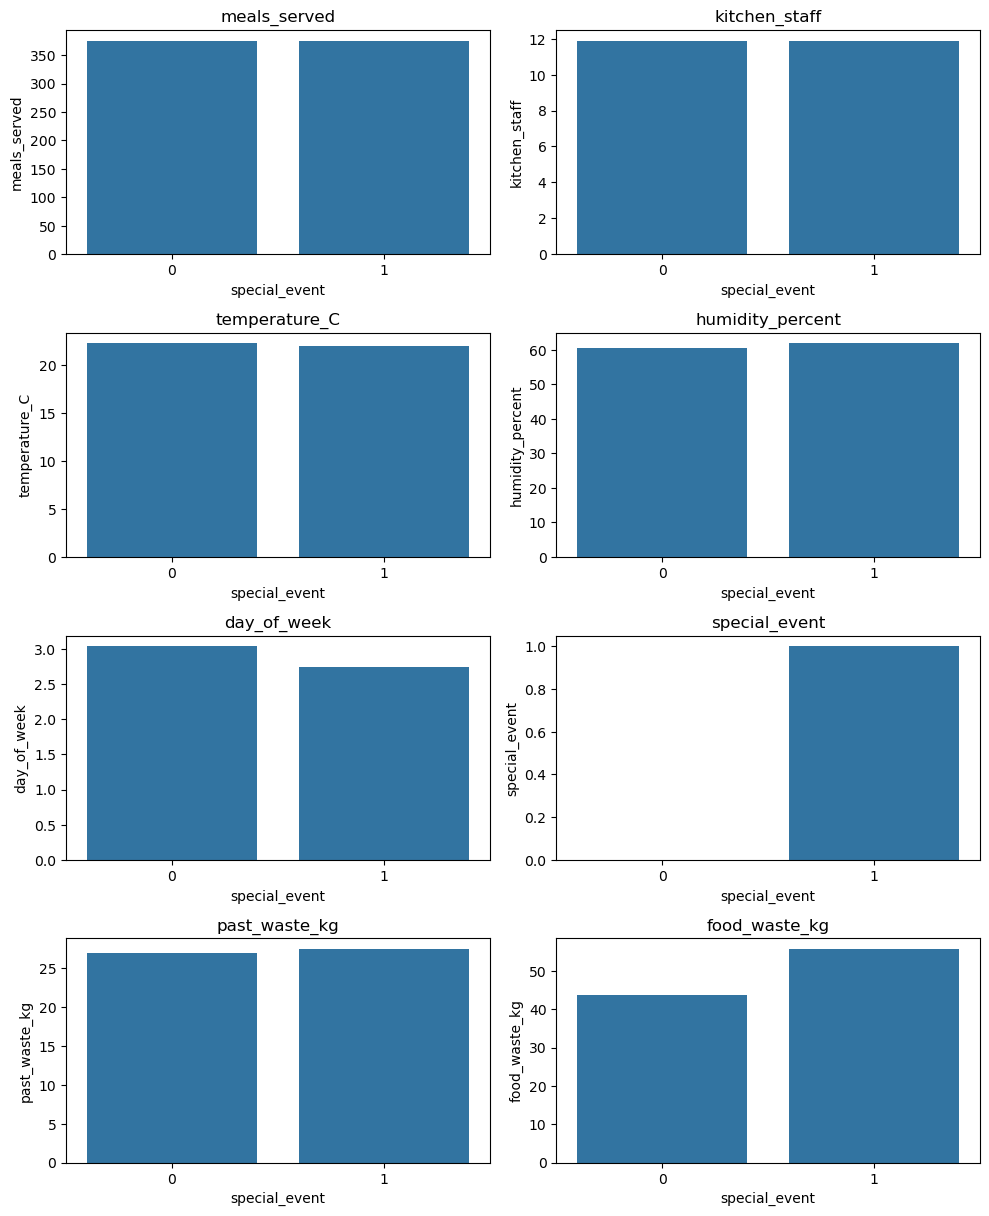

In [17]:
def categorical_vs_numerical(data):
    hue1=data["staff_experience"]
    data1=data.select_dtypes("number")
    plt.figure(figsize=(10,30))
    for i,col in enumerate (data1.columns,1):
        plt.subplot(10,2,i)
        sns.barplot(x=data["special_event"],y=data1[col],ci=None)
        plt.title(col)
        plt.tight_layout()
    plt.show()
categorical_vs_numerical(df.iloc[:,1:])


C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\2600578691.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["waste_category"],y=data1[col],hue=hue1,ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\2600578691.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["waste_category"],y=data1[col],hue=hue1,ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\2600578691.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["waste_category"],y=data1[col],hue=hue1,ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\2600578691.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data["waste_category"],y=data1[col],hue=hue1,ci=None)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\2600578691.py:7: FutureWarning: 

T

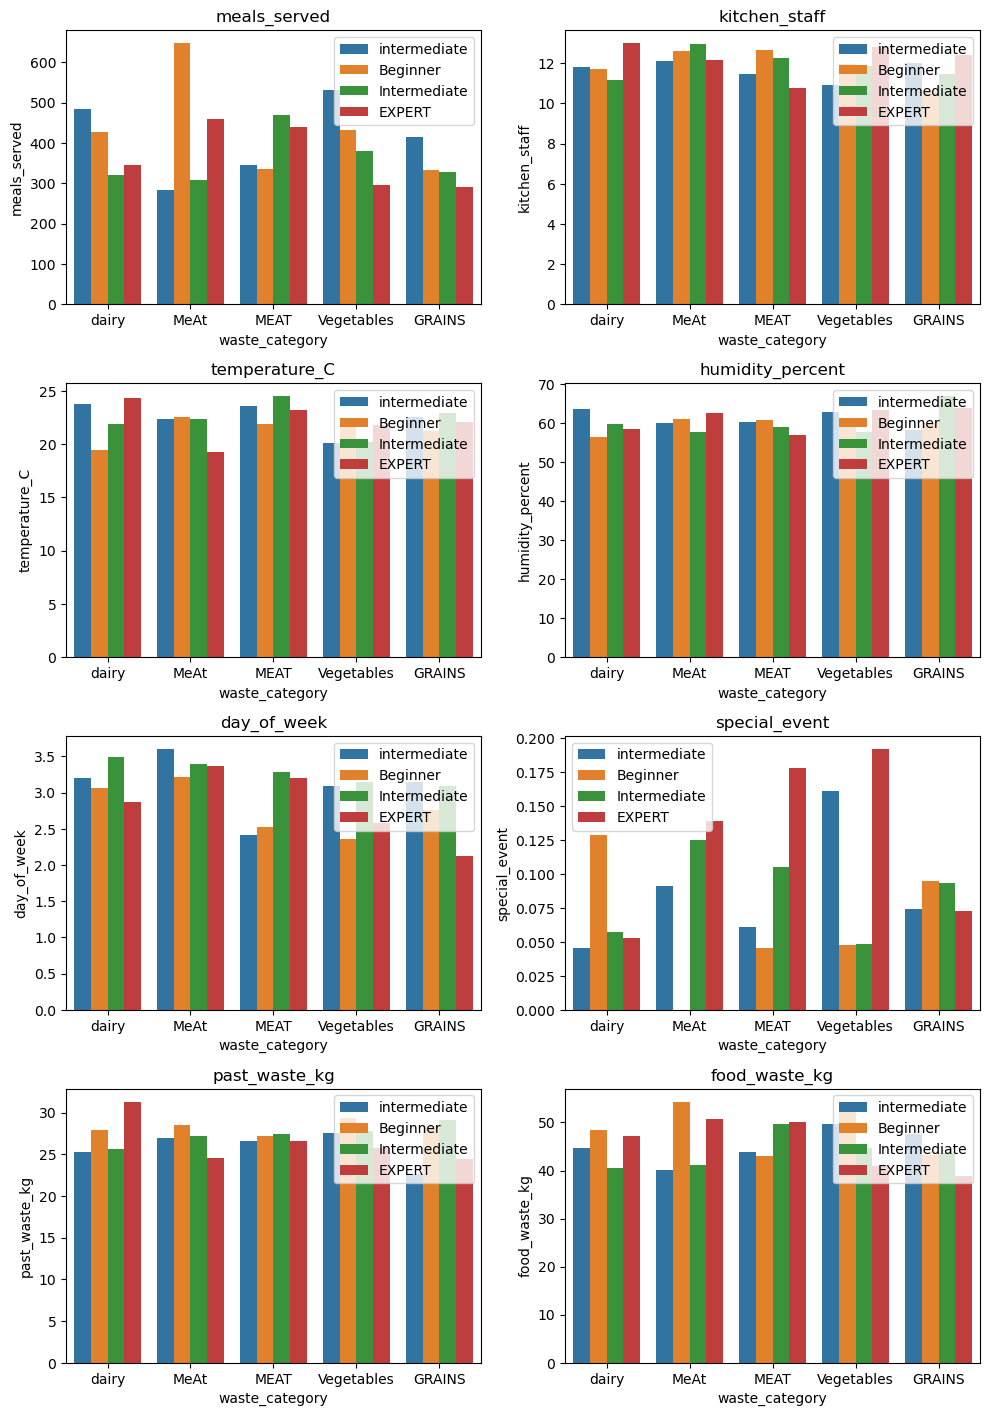

In [18]:
def categorical_vs_numerical(data):
    hue1=data["staff_experience"]
    data1=data.select_dtypes("number")
    plt.figure(figsize=(10,35))
    for i,col in enumerate (data1.columns,1):
        plt.subplot(10,2,i)
        sns.barplot(x=data["waste_category"],y=data1[col],hue=hue1,ci=None)
        plt.title(col)
        plt.legend()
        plt.tight_layout()
    plt.show()

categorical_vs_numerical(df.iloc[:,1:])


## Categorical visualization

In [19]:
def pie_chart(data):
    data = data.select_dtypes("category")
    plt.figure(figsize=(15,20))
    for i,col in enumerate(data.columns,1):
        plt.subplot(3,2,i)
        plt.pie(data[col].value_counts(), labels=data[col].value_counts().index,autopct='%1.2f%%')
        plt.title(f"pie chart {col}")
        plt.legend()
        plt.tight_layout()
    plt.show()

pie_chart(df)

<Figure size 1500x2000 with 0 Axes>

# Data preprocessing

## Drop unnecessary

In [20]:
df.drop(columns=["ID","date"],inplace=True)
df

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465
1,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.549053
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008323
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.621527
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.156984
...,...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.369152
907,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.070121
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.632560
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759


In [21]:
display(df["staff_experience"].value_counts())

staff_experience
Beginner        191
Intermediate    186
EXPERT          186
intermediate    184
Name: count, dtype: int64

## Data Correction

In [22]:
def lower_case_columns(df, cols):
    df[cols] = df[cols].astype(str).apply(lambda x: x.str.lower())
    return df
df = lower_case_columns(df, ["waste_category"])

display(df["waste_category"].value_counts())

df["staff_experience"] = df["staff_experience"].replace("intermediate", "Intermediate")

display(df["staff_experience"].value_counts())

waste_category
meat          379
dairy         180
vegetables    176
grains        176
Name: count, dtype: int64

staff_experience
Intermediate    370
Beginner        191
EXPERT          186
Name: count, dtype: int64

## change data types

In [23]:
cols=["special_event","staff_experience","waste_category"]
df[cols]=df[cols].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      911 non-null    int64   
 1   kitchen_staff     911 non-null    int64   
 2   temperature_C     911 non-null    float64 
 3   humidity_percent  911 non-null    float64 
 4   day_of_week       911 non-null    int64   
 5   special_event     911 non-null    category
 6   past_waste_kg     911 non-null    float64 
 7   staff_experience  747 non-null    category
 8   waste_category    911 non-null    category
 9   food_waste_kg     911 non-null    float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 53.1 KB


### fill null in staff experience with mode

In [24]:
df["staff_experience"] = df["staff_experience"].fillna(df["staff_experience"].mode()[0])

In [25]:

# Step 2: Group by food_waste_kg and fill staff_experience with the mode of each group
def fill_staff_experience(group):
    # Calculate the mode of the group
    mode = group.mode()
    if not mode.empty:  # If mode exists, fill NaN with the mode
        return group.fillna(mode[0])
    else:  # If no mode (all NaN), fill with the overall mode
        return group.fillna(df["staff_experience"].mode()[0])

# Apply the function to fill NaN in staff_experience
#df["staff_experience"] = df.groupby("food_waste_kg")["staff_experience"].transform(fill_staff_experience)

df

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196,13,27.887273,45.362854,0,0,7.740587,Intermediate,dairy,28.946465
1,244,15,10.317872,64.430475,1,0,42.311779,Intermediate,meat,51.549053
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,meat,53.008323
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,meat,48.621527
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,meat,44.156984
...,...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,grains,50.369152
907,483,11,24.912137,59.485091,6,0,36.470276,Intermediate,dairy,43.070121
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,meat,29.632560
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,meat,44.615759


In [26]:
pd.DataFrame({"Null %":(df.isnull().sum()/df.shape[0]*100),"Null count":df.isnull().sum()}).T

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
Null %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df["staff_experience"].value_counts()

staff_experience
Intermediate    534
Beginner        191
EXPERT          186
Name: count, dtype: int64

In [28]:
df[(df["special_event"]==0) & (df["food_waste_kg"]>=100)]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
16,1560,8,23.740401,48.599996,4,0,11.255099,EXPERT,dairy,127.435160
21,1110,11,15.520066,58.404053,1,0,38.878190,Beginner,vegetables,201.327227
213,1510,11,12.434835,34.656879,3,0,47.858689,Intermediate,grains,234.785567
265,2440,13,15.630593,72.864646,4,0,18.923576,EXPERT,meat,175.507129
284,3580,7,24.943089,74.458875,5,0,23.680622,Beginner,meat,181.142320
285,2080,5,11.717821,57.494079,6,0,26.728307,Beginner,grains,140.092944
318,1070,9,10.726785,45.168816,4,0,31.240752,Beginner,dairy,146.548799
321,3190,5,19.916494,31.645219,2,0,46.289435,EXPERT,meat,274.328783
368,4680,14,24.429320,31.968577,6,0,26.208872,Intermediate,meat,251.538932
380,4100,18,21.543320,80.596685,6,0,5.993863,Intermediate,dairy,168.868788


### Handeling outliers

In [29]:
def handle_outlier(data,columns,method="IQR",threshold=1.5,strategy="replace"):
    for col in columns:
        if method=="IQR":
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-threshold*IQR
            upper_bound=Q3+threshold*IQR
        elif method=="Z-score":
            mean=data[col].mean()
            std=data[col].std()
            lower_bound=mean-threshold*std
            upper_bound=mean+threshold*std
        else:
            print("Invalid method")
        if strategy=="replace":
            #with median
            data[col]=np.clip(data[col],lower_bound,upper_bound)
        elif strategy=="remove":
            data=data[(data[col]>=lower_bound) & (data[col]<=upper_bound)]
        else:
            print("Invalid strategy. choose 'replace' or 'remove'")
    return data
COLUM_TO_Process=df[["meals_served","food_waste_kg"]]
#df=handle_outlier(df,COLUM_TO_Process,method="IQR",threshold=1.5,strategy="remove")

COLUM_TO_Process=df[["temperature_C"]]
df=handle_outlier(df,COLUM_TO_Process,method="IQR",threshold=.75,strategy="replace")


In [30]:
# handeling outliers in Age coloum
def handle_outlier(data,columns,method="IQR",threshold=1.5,strategy="replace"):
    for col in columns:
        if method=="IQR":
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-threshold*IQR
            upper_bound=Q3+threshold*IQR
        elif method=="Z-score":
            mean=data[col].mean()
            std=data[col].std()
            lower_bound=mean-threshold*std
            upper_bound=mean+threshold*std
        else:
            print("Invalid method")
        if strategy=="replace":
            #with median
            data[col]=np.clip(data[col],lower_bound,upper_bound)
        elif strategy=="remove":
            data=data[(data[col]<=upper_bound)]
        else:
            print("Invalid strategy. choose 'replace' or 'remove'")
    return data

COLUM_TO_Process=df[["temperature_C"]]
#df=handle_outlier(df,COLUM_TO_Process,method="IQR",threshold=1.5,strategy="remove")
df

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196,13,27.887273,45.362854,0,0,7.740587,Intermediate,dairy,28.946465
1,244,15,10.317872,64.430475,1,0,42.311779,Intermediate,meat,51.549053
2,148,16,27.714300,69.046113,1,0,41.184305,Beginner,meat,53.008323
3,157,19,19.173902,46.292823,6,0,41.543492,Beginner,meat,48.621527
4,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,meat,44.156984
...,...,...,...,...,...,...,...,...,...,...
906,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,grains,50.369152
907,483,11,24.912137,59.485091,6,0,36.470276,Intermediate,dairy,43.070121
908,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,meat,29.632560
909,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,meat,44.615759


In [31]:
#indices_to_drop = df[df["temperature_C"] <= 9].index
#df.drop(indices_to_drop, inplace=True)

df["temperature_C"].mean()

In [32]:
df["temperature_C"].describe()

count    911.000000
mean      22.204814
std        7.558765
min        5.844803
25%       15.684585
50%       22.115040
75%       28.804294
max       38.644076
Name: temperature_C, dtype: float64

In [33]:
#df["temperature_C"] = df["temperature_C"].apply(lambda x: 22.34 if x <= 9 else x)

In [34]:
df[(df["temperature_C"]>=45)]

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg


In [35]:
df.groupby("special_event").agg({"food_waste_kg":"mean"}).T

C:\Users\ahmed\AppData\Local\Temp\ipykernel_5684\957138739.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("special_event").agg({"food_waste_kg":"mean"}).T


special_event,0,1
food_waste_kg,43.828114,55.677847


In [36]:
df["special_event"].value_counts()

special_event
0    833
1     78
Name: count, dtype: int64

In [37]:
df.duplicated().sum()

1

In [38]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      910 non-null    int64   
 1   kitchen_staff     910 non-null    int64   
 2   temperature_C     910 non-null    float64 
 3   humidity_percent  910 non-null    float64 
 4   day_of_week       910 non-null    int64   
 5   special_event     910 non-null    category
 6   past_waste_kg     910 non-null    float64 
 7   staff_experience  910 non-null    category
 8   waste_category    910 non-null    category
 9   food_waste_kg     910 non-null    float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 60.0 KB


## data distribution

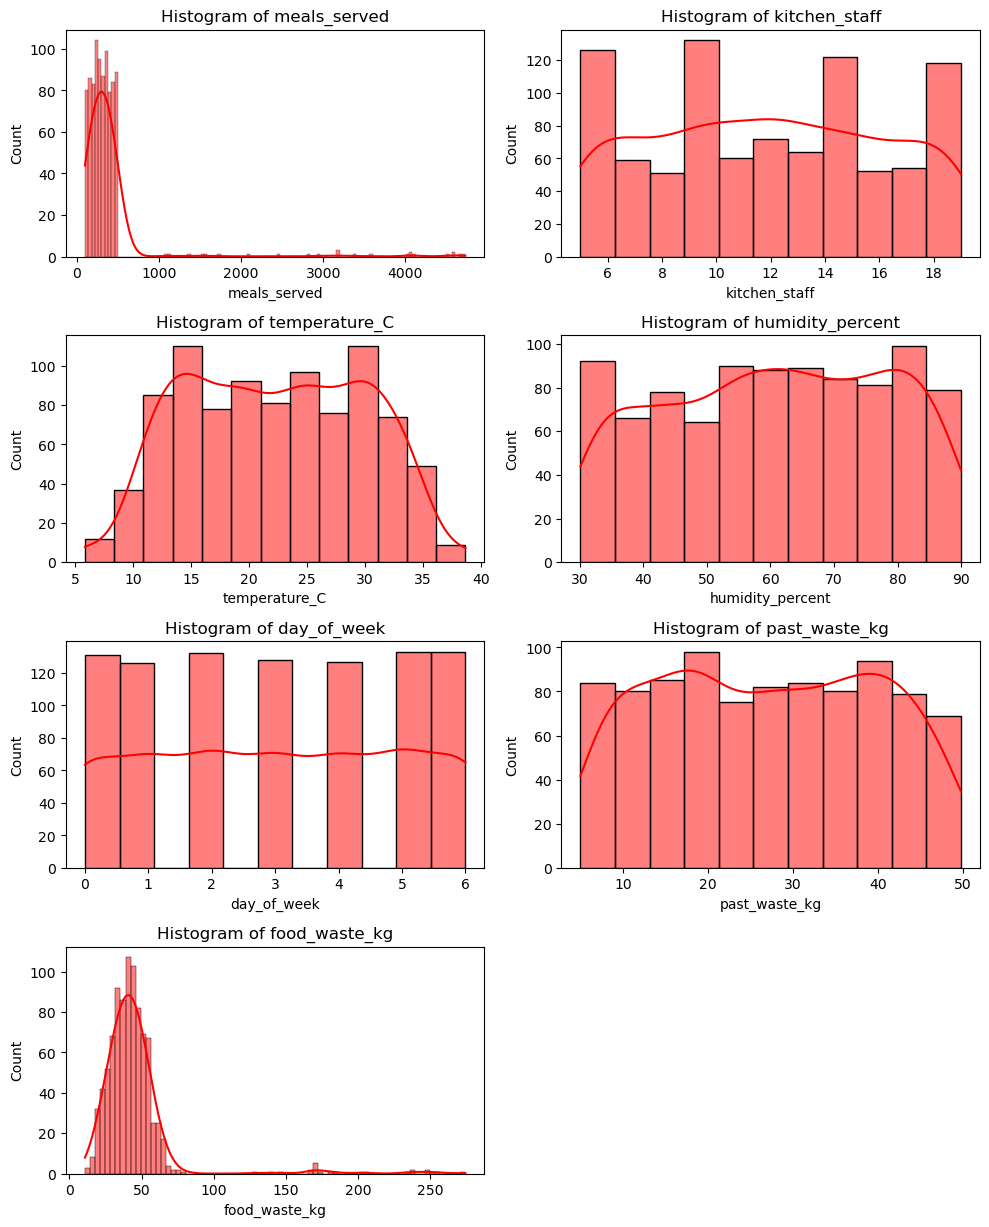

meals_served        6.577530
kitchen_staff       0.020733
temperature_C       0.007439
humidity_percent   -0.094344
day_of_week        -0.010397
past_waste_kg       0.018246
food_waste_kg       4.989182
dtype: float64

In [39]:
def histplots(data):
    data=data.select_dtypes("number")
    plt.figure(figsize=(10,15))
    for i,col in enumerate(data.columns,1):
        plt.subplot(5,2,i)
        plt.title(f"Histogram of {col}")
        sns.histplot(x=data[col],color="red",kde=True)
    plt.tight_layout()

    plt.show()
histplots(df)

df.skew(numeric_only=True)
# if no~1  right
# if no~-1  left
# if no=0  normal

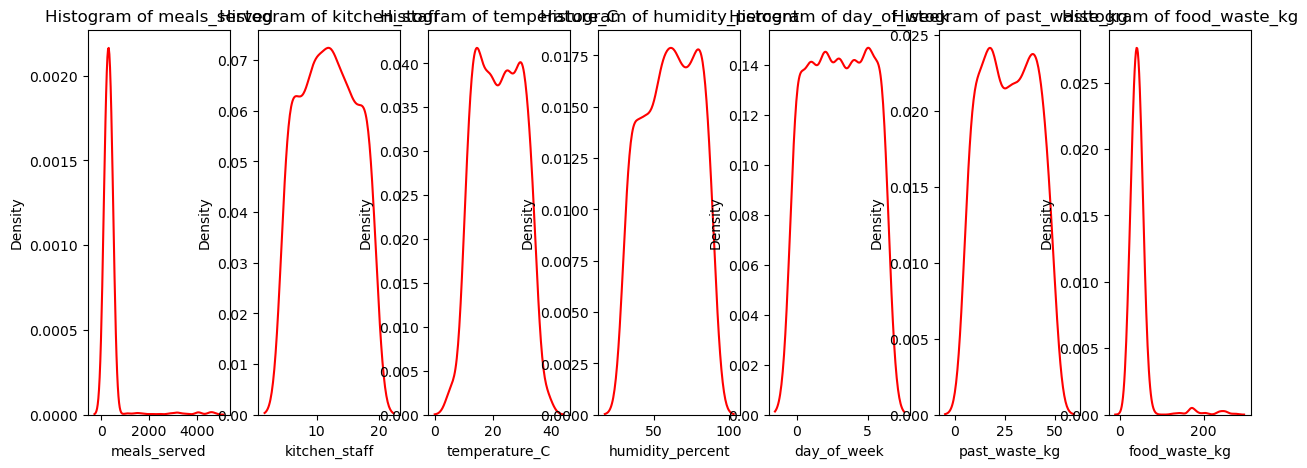

meals_served        6.577530
kitchen_staff       0.020733
temperature_C       0.007439
humidity_percent   -0.094344
day_of_week        -0.010397
past_waste_kg       0.018246
food_waste_kg       4.989182
dtype: float64

<Figure size 640x480 with 0 Axes>

In [40]:
def kdeplots(data):
    data=data.select_dtypes("number")
    plt.figure(figsize=(15,5))
    for i,col in enumerate(data.columns,1):
        plt.subplot(1,len(data.columns),i)
        plt.title(f"Histogram of {col}")
        sns.kdeplot(x=data[col],color="red")
    plt.show()
    plt.tight_layout()
kdeplots(df)
df.skew(numeric_only=True)
# if no~1  right
# if no~-1  left
# if no=0  normal

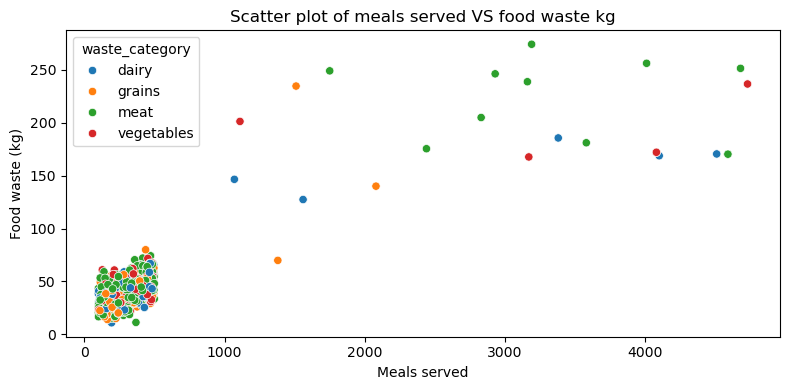

In [41]:
#scater plot
plt.figure(figsize=(8,4))
sns.scatterplot(x=df["meals_served"], y=df["food_waste_kg"], data=df,hue=df["waste_category"])
plt.title("Scatter plot of meals served VS food waste kg")
plt.xlabel("Meals served")
plt.ylabel("Food waste (kg)")
plt.tight_layout()
plt.show()


df["is_meat"] = df["waste_category"] == "meat"

plt.figure(figsize=(6,4))
sns.scatterplot(x=df["temperature_C"], y=df["food_waste_kg"], data=df, hue="is_meat")
plt.title("Scatter plot of Temperature vs Food Waste (Highlighting Meat Waste)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Food Waste (kg)")
plt.legend(title="Is Meat Waste?")
plt.tight_layout()
plt.show()

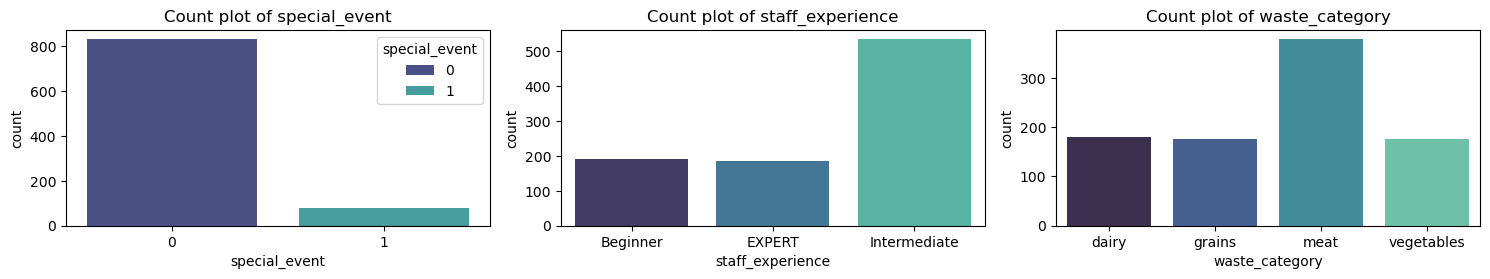

In [42]:
def countplot(data):
    data=data.select_dtypes("category")
    plt.figure(figsize=(15,5))
    for i,col in enumerate(data.columns,1):
        plt.subplot(2,3,i)
        sns.countplot(x=col,data=data,palette='mako',hue=col)
        plt.tight_layout()
        plt.title(f"Count plot of {col}")
    plt.show()

countplot(df)
        

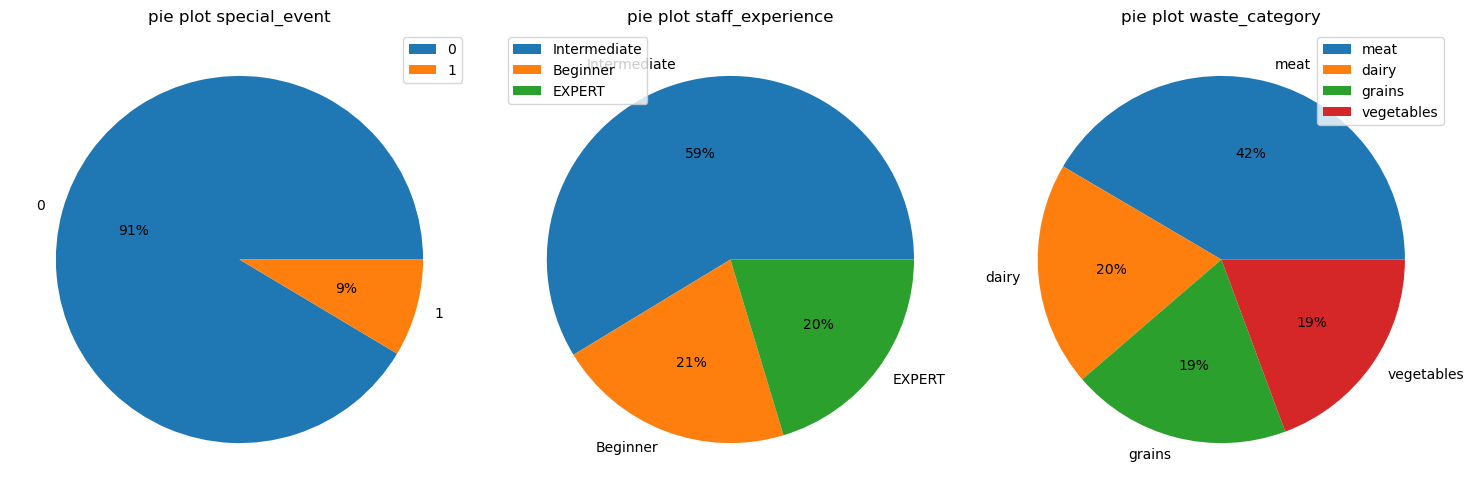

In [43]:
# pi plot method
def piplot(data):
    data=data.select_dtypes("category")
    plt.figure(figsize=(15,10))
    for i, col in enumerate(data.columns, 1):
        plt.subplot(2,3, i)
        unique=data[col].value_counts(normalize=True)
        count=unique.values
        labels=unique.index
        plt.title(f"pie plot {col}")
        plt.pie(count, labels=labels, autopct='%1.0f%%')
        plt.legend()

    plt.tight_layout()
    plt.show()
    

piplot(df)


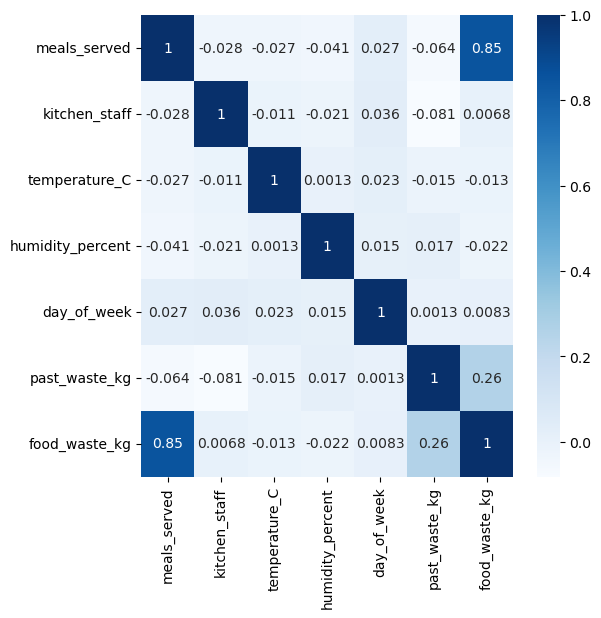

In [44]:
# correlation matrix
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 0 to 910
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   meals_served      910 non-null    int64   
 1   kitchen_staff     910 non-null    int64   
 2   temperature_C     910 non-null    float64 
 3   humidity_percent  910 non-null    float64 
 4   day_of_week       910 non-null    int64   
 5   special_event     910 non-null    category
 6   past_waste_kg     910 non-null    float64 
 7   staff_experience  910 non-null    category
 8   waste_category    910 non-null    category
 9   food_waste_kg     910 non-null    float64 
dtypes: category(3), float64(4), int64(3)
memory usage: 60.0 KB


In [46]:
df.to_csv("processed_data.csv", index=False)  # Save cleaned dataset